In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
pd.options.display.max_rows = 14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sklearn.model_selection as ms
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [30]:
def splitting(a,b,target):
    split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for training_indices, test_indices in split.split(a, b):
        stratified_train_set = a.loc[training_indices]
        stratified_test_set = a.loc[test_indices]
        fea_train, lab_train = (stratified_train_set.drop(target, axis = 1), stratified_train_set[target[0]].copy())
        fea_test, lab_test = (stratified_test_set.drop(target, axis = 1), stratified_test_set[target[0]].copy())
    return stratified_train_set, stratified_test_set, fea_train, lab_train, fea_test, lab_test
def catnum(features, col):
    num, cat = (fea_train.drop(col, axis = 1), fea_train[col])
    return num, cat
def meanerror(a,b):
    print('(meansquareerror, r2score) = ' , (np.sqrt(mean_squared_error(a,b)), r2_score(a,b)))
def crossval(reg, data_tr, labels):
    scores = cross_val_score(reg, data_tr, labels, scoring='neg_mean_squared_error', cv=10)
    sq_scores = np.sqrt(-scores)
    print('(cross_val_mean, cross_val_std) = ' , (sq_scores.mean(), sq_scores.std()))

In [34]:
housing = pd.read_csv('housing.csv')
income_categories = housing['median_income'] // 1.5
income_categories[income_categories >= 5] = 5
stratified_train_set, stratified_test_set, fea_train, lab_train, fea_test, lab_test = splitting(housing, income_categories, ['median_house_value'])
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')
numeric_cols = list(housing_numeric)
categorical_cols = ['ocean_proximity']

%run 'CategoricalEncoder.py'

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.column_names].values
    
numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('standard_scaler', StandardScaler())
                                 ])
categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])
full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])
housing_transformed = full_pipeline.fit_transform(stratified_train_set)

# RandomForestRegressor
print("RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed, lab_train)
h = rf_reg.predict(housing_transformed)
meanerror(lab_train, h)
crossval(rf_reg, housing_transformed, lab_train)

# test data
print("Test data")
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')
housing_transformed1 = full_pipeline.fit_transform(stratified_test_set)
h_pre = rf_reg.predict(housing_transformed1)
meanerror(lab_test, h_pre)
crossval(rf_reg, housing_transformed1, lab_test)

RandomForestRegressor
(meansquareerror, r2score) =  (21899.903640973349, 0.96385954197675205)
(cross_val_mean, cross_val_std) =  (51851.191856292186, 1775.2515709394047)
Test data
(meansquareerror, r2score) =  (58057.719013992144, 0.7501818521310949)
(cross_val_mean, cross_val_std) =  (57744.415573889251, 3301.2144124537913)


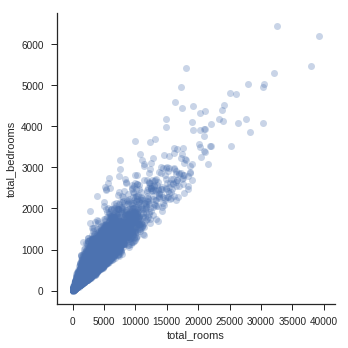

In [35]:
import seaborn as sns
sns.set(style = 'ticks')
x = sns.lmplot('total_rooms', 'total_bedrooms', data=housing, fit_reg=False, scatter_kws={'alpha' : 0.3})

# dropping total_rooms column

In [31]:
stratified_train_set, stratified_test_set, fea_train, lab_train, fea_test, lab_test = splitting(housing, income_categories, ['median_house_value', 'total_rooms'])
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')

housing_transformed2 = full_pipeline.fit_transform(stratified_train_set)

# RandomForestRegressor
print("RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
rf_reg2 = RandomForestRegressor()
x = rf_reg2.fit(housing_transformed2, lab_train)
h = rf_reg2.predict(housing_transformed2)
meanerror(lab_train, h)
crossval(rf_reg2, housing_transformed2, lab_train)
# test data
print("Test data")
housing_numeric, housing_categorical = catnum(fea_test, 'ocean_proximity')
housing_transformed3 = full_pipeline.fit_transform(stratified_test_set)
h_pre = rf_reg2.predict(housing_transformed3)
meanerror(lab_test, h_pre)
crossval(rf_reg2, housing_transformed3, lab_test)

RandomForestRegressor
(meansquareerror, r2score) =  (21760.93394797168, 0.9643167579615306)
(cross_val_mean, cross_val_std) =  (51726.412972588601, 2169.6124008358374)
Test data
(meansquareerror, r2score) =  (58474.872480900551, 0.74657899278545936)
(cross_val_mean, cross_val_std) =  (58053.593761480552, 2718.7479097578857)


# dropping total_bedrooms column

In [32]:
stratified_train_set, stratified_test_set, fea_train, lab_train, fea_test, lab_test = splitting(housing, income_categories, ['median_house_value', 'total_bedrooms'])
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')

housing_transformed4 = full_pipeline.fit_transform(stratified_train_set)

# RandomForestRegressor
print("RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
rf_reg3 = RandomForestRegressor()
x = rf_reg3.fit(housing_transformed4, lab_train)
h = rf_reg3.predict(housing_transformed4)
meanerror(lab_train, h)
crossval(rf_reg3, housing_transformed4, lab_train)
# test data
print("Test data")
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')
housing_transformed5 = full_pipeline.fit_transform(stratified_test_set)
h_pre = rf_reg3.predict(housing_transformed5)
meanerror(lab_test, h_pre)
crossval(rf_reg3, housing_transformed5, lab_test)

RandomForestRegressor
(meansquareerror, r2score) =  (22106.143044027933, 0.96317564097090669)
(cross_val_mean, cross_val_std) =  (51802.170509631746, 1933.4619990368767)
Test data
(meansquareerror, r2score) =  (58004.959478455712, 0.75063568672629255)
(cross_val_mean, cross_val_std) =  (58370.517809267621, 2752.2691686761618)


# dropping both total_rooms & total_bedrooms column

In [33]:
stratified_train_set, stratified_test_set, fea_train, lab_train, fea_test, lab_test = splitting(housing, income_categories, ['median_house_value', 'total_rooms', 'total_bedrooms'])
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')

housing_transformed6 = full_pipeline.fit_transform(stratified_train_set)

# RandomForestRegressor
print("RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
rf_reg3 = RandomForestRegressor()
x = rf_reg3.fit(housing_transformed6, lab_train)
h = rf_reg3.predict(housing_transformed6)
meanerror(lab_train, h)
crossval(rf_reg3, housing_transformed6, lab_train)
# test data
print("Test data")
housing_numeric, housing_categorical = catnum(fea_train, 'ocean_proximity')
housing_transformed7 = full_pipeline.fit_transform(stratified_test_set)
h_pre = rf_reg3.predict(housing_transformed7)
meanerror(lab_test, h_pre)
crossval(rf_reg3, housing_transformed7, lab_test)

RandomForestRegressor
(meansquareerror, r2score) =  (21606.945622589636, 0.96481998646103551)
(cross_val_mean, cross_val_std) =  (51950.207835494839, 2157.1446725081237)
Test data
(meansquareerror, r2score) =  (57874.860836857792, 0.75175302485971185)
(cross_val_mean, cross_val_std) =  (58671.32144368485, 2490.1173716374706)


In [38]:
# conclusion (cross-validation results)
#----------------------------------------------------------------------------------------------------------------
# columns dropped                    train_set error                     test_set 
#-----------------------------------------------------------------------------------------------------------------
# no columns dropped                51851.191856292186                 57744.415573889251
# total_rooms                       51726.412972588601                 58053.593761480552
#total_bedrooms                     51802.170509631746                 58370.517809267621
#total_rooms, total_bedrooms        51950.207835494839                 58671.32144368485